##Ingest

In [1]:
import numpy as np
import pandas as pd
import string

In [2]:
df=pd.read_json('News_Category_Dataset_v2.json',lines=True)

In [3]:
df

,category,headline,authors,link,short_description,date
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,2018-05-26
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018-05-26
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,2018-05-26
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,2018-05-26
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",2018-05-26
...,...,...,...,...,...,...
200848,TECH,RIM CEO Thorsten Heins' 'Significant' Plans Fo...,"Reuters, Reuters",https://www.huffingtonpost.com/entry/rim-ceo-t...,Verizon Wireless and AT&T are already promotin...,2012-01-28
200849,SPORTS,Maria Sharapova Stunned By Victoria Azarenka I...,,https://www.huffingtonpost.com/entry/maria-sha...,"Afterward, Azarenka, more effusive with the pr...",2012-01-28
200850,SPORTS,"Giants Over Patriots, Jets Over Colts Among M...",,https://www.huffingtonpost.com/entry/super-bow...,"Leading up to Super Bowl XLVI, the most talked...",2012-01-28
200851,SPORTS,Aldon Smith Arrested: 49ers Linebacker Busted ...,,https://www.huffingtonpost.com/entry/aldon-smi...,CORRECTION: An earlier version of this story i...,2012-01-28


In [4]:
df=df.iloc[0:3000]

In [5]:
df

,category,headline,authors,link,short_description,date
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,2018-05-26
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018-05-26
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,2018-05-26
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,2018-05-26
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",2018-05-26
...,...,...,...,...,...,...
2995,POLITICS,EXCLUSIVE: These Are The Transgender Students ...,Rebecca Klein,https://www.huffingtonpost.com/entry/transgend...,These transgender students hoped the Departmen...,2018-03-31
2996,ENTERTAINMENT,Will Smith’s 'Date' With Sophia The AI Robot E...,Lee Moran,https://www.huffingtonpost.com/entry/will-smit...,“I’ve heard your songs. Not for me.”,2018-03-31
2997,RELIGION,Christian Devotees Around The World Re-Enact J...,Carol Kuruvilla,https://www.huffingtonpost.com/entry/christian...,"Since medieval times, Christians have prepared...",2018-03-31
2998,POLITICS,Foe Of Endangered Species Act Lands Gig Overse...,Chris D'Angelo,https://www.huffingtonpost.com/entry/susan-com...,It's like “appointing an arsonist as the town ...,2018-03-31


In [6]:
lis=['CRIME', 'ENTERTAINMENT', 'WORLD NEWS', 'POLITICS',
       'SPORTS', 'BUSINESS', 'TRAVEL', 'MEDIA', 'TECH',
       'SCIENCE']

In [7]:
df['category'].unique()

array(['CRIME', 'ENTERTAINMENT', 'WORLD NEWS', 'IMPACT', 'POLITICS',
       'WEIRD NEWS', 'BLACK VOICES', 'WOMEN', 'COMEDY', 'QUEER VOICES',
       'SPORTS', 'BUSINESS', 'TRAVEL', 'MEDIA', 'TECH', 'RELIGION',
       'SCIENCE', 'LATINO VOICES', 'EDUCATION'], dtype=object)

In [8]:
df=df.loc[df['category'].isin(lis)]

In [9]:
df=df.reset_index(drop=True)

In [10]:
df

,category,headline,authors,link,short_description,date
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,2018-05-26
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018-05-26
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,2018-05-26
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,2018-05-26
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",2018-05-26
...,...,...,...,...,...,...
2268,POLITICS,Everything You Need To Know About Scott Pruitt...,Ryan Grenoble,https://www.huffingtonpost.com/entry/scott-pru...,"For six months last year, Pruitt rented a Capi...",2018-03-31
2269,POLITICS,EXCLUSIVE: These Are The Transgender Students ...,Rebecca Klein,https://www.huffingtonpost.com/entry/transgend...,These transgender students hoped the Departmen...,2018-03-31
2270,ENTERTAINMENT,Will Smith’s 'Date' With Sophia The AI Robot E...,Lee Moran,https://www.huffingtonpost.com/entry/will-smit...,“I’ve heard your songs. Not for me.”,2018-03-31
2271,POLITICS,Foe Of Endangered Species Act Lands Gig Overse...,Chris D'Angelo,https://www.huffingtonpost.com/entry/susan-com...,It's like “appointing an arsonist as the town ...,2018-03-31


In [11]:
def removePunct(txt):
  txt_nopunct="".join([c for c in txt if c not in string.punctuation])
  return txt_nopunct

In [12]:
df['textClean']=df['short_description'].apply(lambda x:removePunct(x))
df.head()

,category,headline,authors,link,short_description,date,textClean
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,2018-05-26,She left her husband He killed their children ...
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018-05-26,Of course it has a song
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,2018-05-26,The actor and his longtime girlfriend Anna Ebe...
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,2018-05-26,The actor gives Dems an asskicking for not fig...
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",2018-05-26,The Dietland actress said using the bags is a ...


In [13]:
import re

In [14]:
def tokenize(txt):
  tokens=re.split('\W+',txt)
  return tokens

In [15]:
df['textCleanToken']=df['textClean'].apply(lambda x:tokenize(x.lower()))
df.head()

,category,headline,authors,link,short_description,date,textClean,textCleanToken
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,2018-05-26,She left her husband He killed their children ...,"[she, left, her, husband, he, killed, their, c..."
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018-05-26,Of course it has a song,"[of, course, it, has, a, song]"
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,2018-05-26,The actor and his longtime girlfriend Anna Ebe...,"[the, actor, and, his, longtime, girlfriend, a..."
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,2018-05-26,The actor gives Dems an asskicking for not fig...,"[the, actor, gives, dems, an, asskicking, for,..."
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",2018-05-26,The Dietland actress said using the bags is a ...,"[the, dietland, actress, said, using, the, bag..."


In [16]:
import nltk
nltk.download('stopwords')
stopwords=nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [17]:
def removeStopwords(txt):
  txt_clean=[word for word in txt if word not in stopwords]
  return txt_clean


In [18]:
df['noStopwords']=df['textCleanToken'].apply(lambda x: removeStopwords(x))
df.head()

,category,headline,authors,link,short_description,date,textClean,textCleanToken,noStopwords
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,2018-05-26,She left her husband He killed their children ...,"[she, left, her, husband, he, killed, their, c...","[left, husband, killed, children, another, day..."
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018-05-26,Of course it has a song,"[of, course, it, has, a, song]","[course, song]"
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,2018-05-26,The actor and his longtime girlfriend Anna Ebe...,"[the, actor, and, his, longtime, girlfriend, a...","[actor, longtime, girlfriend, anna, eberstein,..."
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,2018-05-26,The actor gives Dems an asskicking for not fig...,"[the, actor, gives, dems, an, asskicking, for,...","[actor, gives, dems, asskicking, fighting, har..."
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",2018-05-26,The Dietland actress said using the bags is a ...,"[the, dietland, actress, said, using, the, bag...","[dietland, actress, said, using, bags, really,..."


In [19]:
from nltk.stem import PorterStemmer
ps=PorterStemmer()
def stemming(token_txt):
  text=[ps.stem(word) for word in token_txt]
  return text

In [20]:
df['stemmed']=df['noStopwords'].apply(lambda x: stemming(x))
df.head()

,category,headline,authors,link,short_description,date,textClean,textCleanToken,noStopwords,stemmed
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,2018-05-26,She left her husband He killed their children ...,"[she, left, her, husband, he, killed, their, c...","[left, husband, killed, children, another, day...","[left, husband, kill, children, anoth, day, am..."
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018-05-26,Of course it has a song,"[of, course, it, has, a, song]","[course, song]","[cours, song]"
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,2018-05-26,The actor and his longtime girlfriend Anna Ebe...,"[the, actor, and, his, longtime, girlfriend, a...","[actor, longtime, girlfriend, anna, eberstein,...","[actor, longtim, girlfriend, anna, eberstein, ..."
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,2018-05-26,The actor gives Dems an asskicking for not fig...,"[the, actor, gives, dems, an, asskicking, for,...","[actor, gives, dems, asskicking, fighting, har...","[actor, give, dem, asskick, fight, hard, enoug..."
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",2018-05-26,The Dietland actress said using the bags is a ...,"[the, dietland, actress, said, using, the, bag...","[dietland, actress, said, using, bags, really,...","[dietland, actress, said, use, bag, realli, ca..."


In [21]:
def cleanWords(text):
  txt="".join([p for p in text if p not in string.punctuation])
  tokens=re.split("\W+",txt)
  txt=[ps.stem(word) for word in tokens if word not in stopwords]

In [22]:
def listToString(s): 
    
    # initialize an empty string
    str1 = " " 
    
    # return string  
    return (str1.join(s))

In [23]:
df['string']=df['stemmed'].apply(lambda x: listToString(x))
df.head()

,category,headline,authors,link,short_description,date,textClean,textCleanToken,noStopwords,stemmed,string
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,2018-05-26,She left her husband He killed their children ...,"[she, left, her, husband, he, killed, their, c...","[left, husband, killed, children, another, day...","[left, husband, kill, children, anoth, day, am...",left husband kill children anoth day america
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018-05-26,Of course it has a song,"[of, course, it, has, a, song]","[course, song]","[cours, song]",cours song
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,2018-05-26,The actor and his longtime girlfriend Anna Ebe...,"[the, actor, and, his, longtime, girlfriend, a...","[actor, longtime, girlfriend, anna, eberstein,...","[actor, longtim, girlfriend, anna, eberstein, ...",actor longtim girlfriend anna eberstein tie kn...
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,2018-05-26,The actor gives Dems an asskicking for not fig...,"[the, actor, gives, dems, an, asskicking, for,...","[actor, gives, dems, asskicking, fighting, har...","[actor, give, dem, asskick, fight, hard, enoug...",actor give dem asskick fight hard enough donal...
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",2018-05-26,The Dietland actress said using the bags is a ...,"[the, dietland, actress, said, using, the, bag...","[dietland, actress, said, using, bags, really,...","[dietland, actress, said, use, bag, realli, ca...",dietland actress said use bag realli cathart t...


In [24]:
def removeNum(txt):
  result = ''.join([i for i in txt if not i.isdigit()])
  return result

In [25]:
df['Nonum']=df['string'].apply(lambda x: removeNum(x))

In [26]:
df.head()

,category,headline,authors,link,short_description,date,textClean,textCleanToken,noStopwords,stemmed,string,Nonum
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,2018-05-26,She left her husband He killed their children ...,"[she, left, her, husband, he, killed, their, c...","[left, husband, killed, children, another, day...","[left, husband, kill, children, anoth, day, am...",left husband kill children anoth day america,left husband kill children anoth day america
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018-05-26,Of course it has a song,"[of, course, it, has, a, song]","[course, song]","[cours, song]",cours song,cours song
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,2018-05-26,The actor and his longtime girlfriend Anna Ebe...,"[the, actor, and, his, longtime, girlfriend, a...","[actor, longtime, girlfriend, anna, eberstein,...","[actor, longtim, girlfriend, anna, eberstein, ...",actor longtim girlfriend anna eberstein tie kn...,actor longtim girlfriend anna eberstein tie kn...
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,2018-05-26,The actor gives Dems an asskicking for not fig...,"[the, actor, gives, dems, an, asskicking, for,...","[actor, gives, dems, asskicking, fighting, har...","[actor, give, dem, asskick, fight, hard, enoug...",actor give dem asskick fight hard enough donal...,actor give dem asskick fight hard enough donal...
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",2018-05-26,The Dietland actress said using the bags is a ...,"[the, dietland, actress, said, using, the, bag...","[dietland, actress, said, using, bags, really,...","[dietland, actress, said, use, bag, realli, ca...",dietland actress said use bag realli cathart t...,dietland actress said use bag realli cathart t...


##TF-IDF Reduced Matrix

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
tv=TfidfVectorizer()
X=tv.fit_transform(df['Nonum'])
print(X.shape)

(2273, 5175)


In [28]:
df3=pd.DataFrame(X.toarray(),columns=tv.get_feature_names())

In [29]:
df3.head()

,aaron,abandon,abba,abbott,abc,abdelbasit,abdelmagi,abdeslam,abdul,abdulfatai,abel,abil,abl,abnorm,aboard,abort,abram,abroad,abrupt,absolut,absurd,abus,academi,accept,access,accessori,accid,accio,acclaim,accomplish,accord,account,accur,accus,achiev,acknowledg,aclu,acquir,acquit,across,...,xmen,xray,yall,yanni,yarber,yasser,yassmin,ye,yeah,year,yearold,yeezi,yehuda,yell,yellowston,yesterday,yet,yike,york,yorker,youd,youll,young,younger,your,youth,youtub,yu,zachari,zeitgeist,zero,zimmerman,zing,zink,zionist,zoo,zte,zuckerberg,zuckerborg,zwaan
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##K-Means Cluster

In [30]:
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [31]:
k = 10
model = KMeans(n_clusters=k, init='k-means++', max_iter=2273, n_init=15,random_state=20)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=2273,
       n_clusters=10, n_init=15, n_jobs=None, precompute_distances='auto',
       random_state=20, tol=0.0001, verbose=0)

In [32]:
df['clusters']=model.labels_

In [33]:
X

<2273x5175 sparse matrix of type '<class 'numpy.float64'>'
	with 19015 stored elements in Compressed Sparse Row format>

In [34]:
df

,category,headline,authors,link,short_description,date,textClean,textCleanToken,noStopwords,stemmed,string,Nonum,clusters
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,2018-05-26,She left her husband He killed their children ...,"[she, left, her, husband, he, killed, their, c...","[left, husband, killed, children, another, day...","[left, husband, kill, children, anoth, day, am...",left husband kill children anoth day america,left husband kill children anoth day america,3
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018-05-26,Of course it has a song,"[of, course, it, has, a, song]","[course, song]","[cours, song]",cours song,cours song,3
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,2018-05-26,The actor and his longtime girlfriend Anna Ebe...,"[the, actor, and, his, longtime, girlfriend, a...","[actor, longtime, girlfriend, anna, eberstein,...","[actor, longtim, girlfriend, anna, eberstein, ...",actor longtim girlfriend anna eberstein tie kn...,actor longtim girlfriend anna eberstein tie kn...,3
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,2018-05-26,The actor gives Dems an asskicking for not fig...,"[the, actor, gives, dems, an, asskicking, for,...","[actor, gives, dems, asskicking, fighting, har...","[actor, give, dem, asskick, fight, hard, enoug...",actor give dem asskick fight hard enough donal...,actor give dem asskick fight hard enough donal...,9
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",2018-05-26,The Dietland actress said using the bags is a ...,"[the, dietland, actress, said, using, the, bag...","[dietland, actress, said, using, bags, really,...","[dietland, actress, said, use, bag, realli, ca...",dietland actress said use bag realli cathart t...,dietland actress said use bag realli cathart t...,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2268,POLITICS,Everything You Need To Know About Scott Pruitt...,Ryan Grenoble,https://www.huffingtonpost.com/entry/scott-pru...,"For six months last year, Pruitt rented a Capi...",2018-03-31,For six months last year Pruitt rented a Capit...,"[for, six, months, last, year, pruitt, rented,...","[six, months, last, year, pruitt, rented, capi...","[six, month, last, year, pruitt, rent, capitol...",six month last year pruitt rent capitol hill c...,six month last year pruitt rent capitol hill c...,0
2269,POLITICS,EXCLUSIVE: These Are The Transgender Students ...,Rebecca Klein,https://www.huffingtonpost.com/entry/transgend...,These transgender students hoped the Departmen...,2018-03-31,These transgender students hoped the Departmen...,"[these, transgender, students, hoped, the, dep...","[transgender, students, hoped, department, edu...","[transgend, student, hope, depart, educ, would...",transgend student hope depart educ would help ...,transgend student hope depart educ would help ...,3
2270,ENTERTAINMENT,Will Smith’s 'Date' With Sophia The AI Robot E...,Lee Moran,https://www.huffingtonpost.com/entry/will-smit...,“I’ve heard your songs. Not for me.”,2018-03-31,“I’ve heard your songs Not for me”,"[, i, ve, heard, your, songs, not, for, me, ]","[, heard, songs, ]","[, heard, song, ]",heard song,heard song,3
2271,POLITICS,Foe Of Endangered Species Act Lands Gig Overse...,Chris D'Angelo,https://www.huffingtonpost.com/entry/susan-com...,It's like “appointing an arsonist as the town ...,2018-03-31,Its like “appointing an arsonist as the town f...,"[its, l

In [35]:
model.labels_

array([3, 3, 3, ..., 3, 4, 5], dtype=int32)

In [36]:
max(model.labels_)

9

In [37]:
for i in range(0,10):
  print(df.loc[df['clusters'] == i])
  

           category  ... clusters
35    ENTERTAINMENT  ...        0
78    ENTERTAINMENT  ...        0
81    ENTERTAINMENT  ...        0
115        POLITICS  ...        0
130   ENTERTAINMENT  ...        0
...             ...  ...      ...
2075     WORLD NEWS  ...        0
2084       POLITICS  ...        0
2178       POLITICS  ...        0
2230       POLITICS  ...        0
2268       POLITICS  ...        0

[69 rows x 13 columns]
           category  ... clusters
4     ENTERTAINMENT  ...        1
5     ENTERTAINMENT  ...        1
88         POLITICS  ...        1
111        POLITICS  ...        1
143        POLITICS  ...        1
...             ...  ...      ...
2223         SPORTS  ...        1
2228       POLITICS  ...        1
2237  ENTERTAINMENT  ...        1
2241          CRIME  ...        1
2246          MEDIA  ...        1

[161 rows x 13 columns]
           category  ... clusters
52         POLITICS  ...        2
71         POLITICS  ...        2
93       WORLD NEWS  ...        2

In [38]:
model.inertia_

2209.6745952444467

In [39]:
centroids=model.cluster_centers_

In [40]:
from sklearn.decomposition import PCA

In [41]:
predictions=model.predict(df3)

In [42]:
predictions

array([3, 3, 3, ..., 3, 4, 5], dtype=int32)

In [43]:
len(predictions)

2273

In [44]:
pca=PCA(n_components=2).fit(df3)

In [45]:
centroids=pca.transform(centroids)

In [46]:
pcadata=pca.transform(df3)

In [47]:
pcadata

array([[-0.05471481,  0.02073526],
       [-0.04207101,  0.02565513],
       [-0.02828871,  0.01772962],
       ...,
       [-0.02807333,  0.0220791 ],
       [ 0.18172574,  0.14509922],
       [-0.04403887, -0.00820902]])

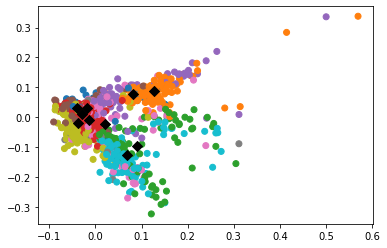

In [48]:
color1=["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"]
color=[color1[i] for i in predictions]
plt.scatter(pcadata[:,0],pcadata[:,1],c=color)
plt.scatter(centroids[:,0],centroids[:,1],marker="D",s=50,c='#000000')
plt.show()

In [49]:
data = pd.DataFrame({"Index": df.index, "Cluster": df.clusters, "Category": df.category})

In [50]:
data

,Index,Cluster,Category
0,0,3,CRIME
1,1,3,ENTERTAINMENT
2,2,3,ENTERTAINMENT
3,3,9,ENTERTAINMENT
4,4,1,ENTERTAINMENT
...,...,...,...
2268,2268,0,POLITICS
2269,2269,3,POLITICS
2270,2270,3,ENTERTAINMENT
2271,2271,4,POLITICS


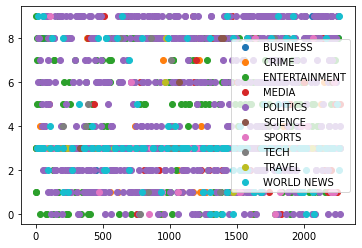

In [51]:
groups = data.groupby("Category")
for name, group in groups:
    plt.plot(group["Index"], group["Cluster"], marker="o", linestyle="", label=name)
plt.legend()

In [52]:
from sklearn.manifold import TSNE

In [53]:
model=TSNE(learning_rate=100)

In [54]:
tsneFeats=model.fit_transform(X)

In [55]:
tsneFeats[1:4,:]

array([[-3.8264954,  0.8801273],
       [ 3.2719376, -2.5802364],
       [ 2.0658634, -0.1286295]], dtype=float32)

In [56]:
import seaborn as sns

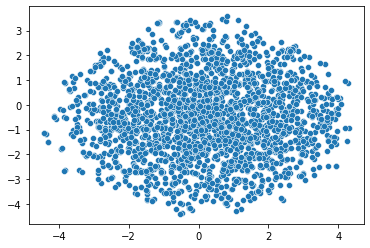

In [57]:
sns.scatterplot(x=tsneFeats[:,0],y=tsneFeats[:,1])

In [58]:
data['tsneX']=tsneFeats[:,0]
data['tsneY']=tsneFeats[:,1]

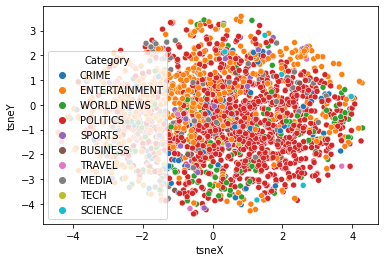

In [59]:
sns.scatterplot(x='tsneX',y='tsneY',hue='Category', data=data)

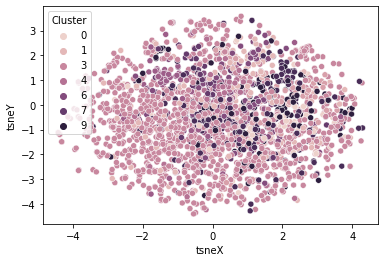

In [60]:
sns.scatterplot(x='tsneX',y='tsneY',hue='Cluster', data=data)

In [61]:
import scipy.cluster.hierarchy as sch

In [62]:
from sklearn.cluster import AgglomerativeClustering

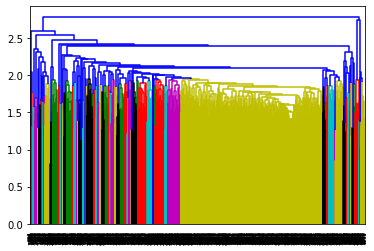

In [63]:
dendrogram=sch.dendrogram(sch.linkage(df3,method='ward'))

In [64]:
heiCluster=AgglomerativeClustering(n_clusters=10, affinity='euclidean',linkage='ward')

In [65]:
heirachyFit=heiCluster.fit_predict(df3)

In [66]:
heirachyFit

array([3, 3, 3, ..., 3, 3, 5])

In [67]:
max(heirachyFit)

9

In [68]:
data['heirarchy']=heirachyFit

In [69]:
data

,Index,Cluster,Category,tsneX,tsneY,heirarchy
0,0,3,CRIME,-0.645232,-0.817739,3
1,1,3,ENTERTAINMENT,-3.826495,0.880127,3
2,2,3,ENTERTAINMENT,3.271938,-2.580236,3
3,3,9,ENTERTAINMENT,2.065863,-0.128630,3
4,4,1,ENTERTAINMENT,-0.384215,1.468377,3
...,...,...,...,...,...,...
2268,2268,0,POLITICS,-0.090405,-1.808250,3
2269,2269,3,POLITICS,0.943221,-2.269585,3
2270,2270,3,ENTERTAINMENT,-3.719480,0.657356,3
2271,2271,4,POLITICS,0.761846,1.391522,3


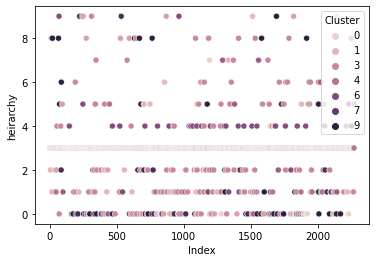

In [70]:
sns.scatterplot(x='Index',y='heirarchy',hue='Cluster', data=data)

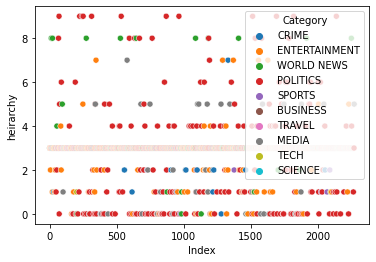

In [71]:
sns.scatterplot(x='Index',y='heirarchy',hue='Category', data=data)

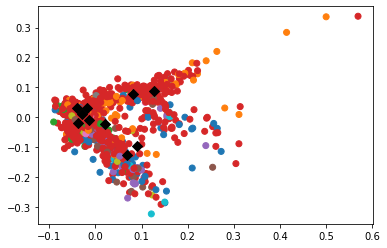

In [72]:
color1=["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"]
color=[color1[i] for i in heirachyFit]
plt.scatter(pcadata[:,0],pcadata[:,1],c=color)
plt.scatter(centroids[:,0],centroids[:,1],marker="D",s=50,c='#000000')
plt.show()

##LDA topic modelling

In [73]:
import sklearn.metrics as sm

In [74]:
from sklearn.decomposition import LatentDirichletAllocation

In [75]:
X = df3.values

In [76]:
lda = LatentDirichletAllocation(n_components=10,random_state=0)

In [77]:
lda.fit(X)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=10, n_jobs=None,
                          perp_tol=0.1, random_state=0, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

In [78]:
lda.transform(df3)

array([[0.02754535, 0.02754456, 0.02754382, ..., 0.02754828, 0.75209452,
        0.0275439 ],
       [0.04143907, 0.04143907, 0.04144583, ..., 0.62699228, 0.04147412,
        0.04144007],
       [0.02515193, 0.02515209, 0.02515413, ..., 0.02515298, 0.02515242,
        0.02515271],
       ...,
       [0.04151005, 0.04151005, 0.04152203, ..., 0.04152591, 0.04151005,
        0.04151176],
       [0.02570185, 0.76869588, 0.02570025, ..., 0.02570136, 0.02569982,
        0.02569952],
       [0.80266909, 0.02192602, 0.02192528, ..., 0.02192594, 0.02192551,
        0.02193163]])

In [79]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)
import nltk
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [80]:
dictionary = gensim.corpora.Dictionary(df.stemmed)
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 america
1 anoth
2 children
3 day
4 husband
5 kill
6 left
7 cours
8 song
9 actor
10 anna


In [81]:
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)

In [82]:
bow_corpus = [dictionary.doc2bow(doc) for doc in df.stemmed]
bow_corpus[1999]

[(16, 1), (29, 1)]

In [83]:
bow_doc_4310 = bow_corpus[1999]
for i in range(len(bow_doc_4310)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_4310[i][0], 
                                               dictionary[bow_doc_4310[i][0]], 
bow_doc_4310[i][1]))

Word 16 ("film") appears 1 time.
Word 29 ("us") appears 1 time.


In [84]:
from gensim import corpora, models
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]
from pprint import pprint
for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 0.5357350619640199),
 (1, 0.5481895521249149),
 (2, 0.42965204159094494),
 (3, 0.4773628404895229)]


In [85]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=10, id2word=dictionary, passes=2, workers=2)

In [86]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.161*"" + 0.026*"republican" + 0.022*"time" + 0.021*"said" + 0.020*"much" + 0.020*"trump" + 0.017*"alleg" + 0.016*"court" + 0.016*"want" + 0.015*"back"
Topic: 1 
Words: 0.042*"hous" + 0.039*"presid" + 0.036*"white" + 0.033*"say" + 0.031*"star" + 0.026*"peopl" + 0.022*"want" + 0.019*"get" + 0.015*"month" + 0.015*"trump"
Topic: 2 
Words: 0.060*"year" + 0.030*"presid" + 0.027*"former" + 0.027*"reportedli" + 0.023*"said" + 0.021*"offici" + 0.021*"new" + 0.021*"even" + 0.020*"state" + 0.018*"two"
Topic: 3 
Words: 0.057*"said" + 0.041*"one" + 0.034*"call" + 0.022*"come" + 0.020*"new" + 0.020*"state" + 0.018*"trump" + 0.017*"secretari" + 0.015*"former" + 0.014*"investig"
Topic: 4 
Words: 0.052*"said" + 0.049*"say" + 0.044*"trump" + 0.036*"" + 0.032*"presid" + 0.028*"news" + 0.027*"report" + 0.026*"go" + 0.020*"donald" + 0.019*"lawyer"
Topic: 5 
Words: 0.085*"said" + 0.033*"state" + 0.033*"" + 0.030*"us" + 0.029*"say" + 0.022*"trump" + 0.021*"make" + 0.018*"senat" + 0.018*"fo

In [87]:
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=10, id2word=dictionary, passes=2, workers=4)
for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.068*"" + 0.027*"go" + 0.026*"want" + 0.024*"movi" + 0.024*"report" + 0.023*"peopl" + 0.022*"star" + 0.021*"also" + 0.018*"say" + 0.017*"student"
Topic: 1 Word: 0.035*"" + 0.029*"time" + 0.028*"show" + 0.027*"say" + 0.023*"talk" + 0.021*"need" + 0.020*"make" + 0.019*"alleg" + 0.018*"one" + 0.017*"public"
Topic: 2 Word: 0.034*"trump" + 0.034*"" + 0.026*"like" + 0.025*"hit" + 0.023*"michael" + 0.023*"said" + 0.020*"thing" + 0.020*"film" + 0.019*"meet" + 0.018*"man"
Topic: 3 Word: 0.035*"day" + 0.030*"america" + 0.025*"play" + 0.022*"love" + 0.022*"open" + 0.019*"one" + 0.019*"includ" + 0.019*"use" + 0.018*"victim" + 0.018*"stop"
Topic: 4 Word: 0.034*"year" + 0.034*"say" + 0.023*"last" + 0.023*"much" + 0.021*"got" + 0.020*"group" + 0.020*"month" + 0.019*"take" + 0.018*"democrat" + 0.016*"gun"
Topic: 5 Word: 0.067*"said" + 0.037*"hous" + 0.026*"white" + 0.025*"singer" + 0.024*"" + 0.020*"could" + 0.019*"he" + 0.019*"say" + 0.018*"next" + 0.018*"effort"
Topic: 6 Word: 0.034*

In [88]:
df['stemmed'][1999]

['third', 'highestgross', 'film', 'us']

In [89]:
for index, score in sorted(lda_model[bow_corpus[1999]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model.print_topic(index, 10)))


Score: 0.6999475359916687	 
Topic: 0.047*"trump" + 0.031*"one" + 0.027*"said" + 0.025*"like" + 0.024*"week" + 0.021*"last" + 0.021*"star" + 0.020*"actress" + 0.018*"offic" + 0.017*"us"

Score: 0.033346690237522125	 
Topic: 0.085*"said" + 0.033*"state" + 0.033*"" + 0.030*"us" + 0.029*"say" + 0.022*"trump" + 0.021*"make" + 0.018*"senat" + 0.018*"former" + 0.018*"need"

Score: 0.03334251418709755	 
Topic: 0.063*"show" + 0.049*"also" + 0.028*"new" + 0.028*"right" + 0.022*"could" + 0.021*"back" + 0.020*"gun" + 0.019*"tv" + 0.019*"school" + 0.018*"us"

Score: 0.03334154561161995	 
Topic: 0.060*"year" + 0.030*"presid" + 0.027*"former" + 0.027*"reportedli" + 0.023*"said" + 0.021*"offici" + 0.021*"new" + 0.021*"even" + 0.020*"state" + 0.018*"two"

Score: 0.033339399844408035	 
Topic: 0.057*"said" + 0.041*"one" + 0.034*"call" + 0.022*"come" + 0.020*"new" + 0.020*"state" + 0.018*"trump" + 0.017*"secretari" + 0.015*"former" + 0.014*"investig"

Score: 0.033338334411382675	 
Topic: 0.063*"trump" + 

In [90]:
for index, score in sorted(lda_model_tfidf[bow_corpus[1999]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model_tfidf.print_topic(index, 10)))


Score: 0.6999108195304871	 
Topic: 0.034*"trump" + 0.034*"" + 0.026*"like" + 0.025*"hit" + 0.023*"michael" + 0.023*"said" + 0.020*"thing" + 0.020*"film" + 0.019*"meet" + 0.018*"man"

Score: 0.03336430713534355	 
Topic: 0.043*"trump" + 0.031*"said" + 0.030*"us" + 0.029*"comedian" + 0.027*"look" + 0.027*"know" + 0.021*"littl" + 0.021*"use" + 0.019*"would" + 0.016*""

Score: 0.03335370495915413	 
Topic: 0.046*"presid" + 0.027*"one" + 0.023*"said" + 0.022*"two" + 0.021*"trump" + 0.021*"us" + 0.020*"reportedli" + 0.020*"critic" + 0.018*"" + 0.018*"senat"

Score: 0.03334774449467659	 
Topic: 0.035*"day" + 0.030*"america" + 0.025*"play" + 0.022*"love" + 0.022*"open" + 0.019*"one" + 0.019*"includ" + 0.019*"use" + 0.018*"victim" + 0.018*"stop"

Score: 0.033339742571115494	 
Topic: 0.035*"star" + 0.031*"school" + 0.031*"state" + 0.028*"new" + 0.026*"back" + 0.022*"lot" + 0.021*"first" + 0.021*"appear" + 0.021*"realli" + 0.020*"would"

Score: 0.03333839401602745	 
Topic: 0.068*"" + 0.027*"go" + 

In [91]:

import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)
import nltk
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [92]:
stemmer = SnowballStemmer('english')
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

In [93]:
unseen_document = 'Trump talks to Obama'
bow_vector = dictionary.doc2bow(preprocess(unseen_document))
for index, score in sorted(lda_model[bow_vector], key=lambda tup: -1*tup[1]):
    print("Score: {}\t Topic: {}".format(score, lda_model.print_topic(index, 5)))

Score: 0.6999678611755371	 Topic: 0.063*"trump" + 0.039*"said" + 0.030*"use" + 0.020*"made" + 0.019*"protest"
Score: 0.03334296867251396	 Topic: 0.042*"hous" + 0.039*"presid" + 0.036*"white" + 0.033*"say" + 0.031*"star"
Score: 0.03333905711770058	 Topic: 0.047*"trump" + 0.031*"one" + 0.027*"said" + 0.025*"like" + 0.024*"week"
Score: 0.03333757445216179	 Topic: 0.052*"said" + 0.049*"say" + 0.044*"trump" + 0.036*"" + 0.032*"presid"
Score: 0.03333713486790657	 Topic: 0.161*"" + 0.026*"republican" + 0.022*"time" + 0.021*"said" + 0.020*"much"
Score: 0.033336058259010315	 Topic: 0.042*"new" + 0.033*"state" + 0.032*"would" + 0.028*"news" + 0.026*"say"
Score: 0.03333578631281853	 Topic: 0.057*"said" + 0.041*"one" + 0.034*"call" + 0.022*"come" + 0.020*"new"
Score: 0.03333538770675659	 Topic: 0.085*"said" + 0.033*"state" + 0.033*"" + 0.030*"us" + 0.029*"say"
Score: 0.033334165811538696	 Topic: 0.063*"show" + 0.049*"also" + 0.028*"new" + 0.028*"right" + 0.022*"could"
Score: 0.03333399444818497	 T

##Biclustering Doc2Vec

In [94]:
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize


In [95]:
import nltk


nltk.download('punkt')
tagged_data = [TaggedDocument(words=word_tokenize(_d.lower()), tags=[str(i)]) for i, _d in enumerate(df['Nonum'])]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [96]:
max_epochs = 100
vec_size = 200
alpha = 0.025

model = Doc2Vec(size=vec_size,
                alpha=alpha, 
                min_alpha=0.00025,
                min_count=1,
                dm =1)
  
model.build_vocab(tagged_data)

for epoch in range(max_epochs):
    print('iteration {0}'.format(epoch))
    model.train(tagged_data,
                total_examples=model.corpus_count,
                epochs=model.iter)
    # decrease the learning rate
    model.alpha -= 0.0002
    # fix the learning rate, no decay
    model.min_alpha = model.alpha

model.save("d2v.model")
print("Model Saved")

/usr/local/lib/python3.7/dist-packages/gensim/models/doc2vec.py:570: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")


iteration 0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).


iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9
iteration 10
iteration 11
iteration 12
iteration 13
iteration 14
iteration 15
iteration 16
iteration 17
iteration 18
iteration 19
iteration 20
iteration 21
iteration 22
iteration 23
iteration 24
iteration 25
iteration 26
iteration 27
iteration 28
iteration 29
iteration 30
iteration 31
iteration 32
iteration 33
iteration 34
iteration 35
iteration 36
iteration 37
iteration 38
iteration 39
iteration 40
iteration 41
iteration 42
iteration 43
iteration 44
iteration 45
iteration 46
iteration 47
iteration 48
iteration 49
iteration 50
iteration 51
iteration 52
iteration 53
iteration 54
iteration 55
iteration 56
iteration 57
iteration 58
iteration 59
iteration 60
iteration 61
iteration 62
iteration 63
iteration 64
iteration 65
iteration 66
iteration 67
iteration 68
iteration 69
iteration 70
iteration 71
iteration 72
iteration 73
iteration 74
iteration 75
iteration 76
iteration 77
iteratio

Text(0.5, 1.05, 'Original dataset')

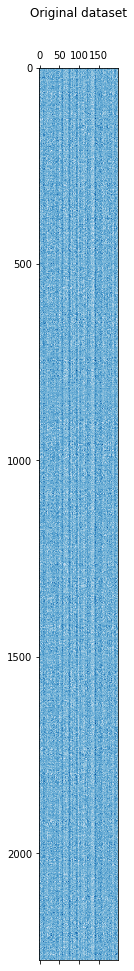

In [97]:
nnvec=model.docvecs.vectors_docs
from sklearn.cluster import SpectralBiclustering
from sklearn.metrics import consensus_score




plt.matshow(nnvec, cmap=plt.cm.Blues)
plt.title("Original dataset")



In [98]:
rng = np.random.RandomState(0)
row_idx = rng.permutation(nnvec.shape[0])
col_idx = rng.permutation(nnvec.shape[1])
data = nnvec[row_idx][:, col_idx]

Text(0.5, 1.05, 'Shuffled dataset')

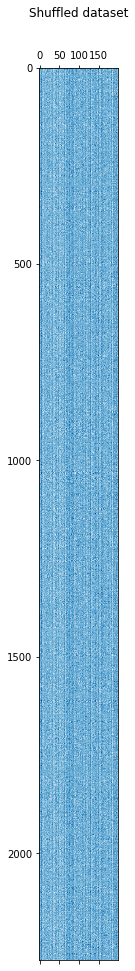

In [99]:
plt.matshow(data, cmap=plt.cm.Blues)
plt.title("Shuffled dataset")

In [100]:
model = SpectralBiclustering(n_clusters=10, method='log',
                             random_state=0)
model.fit(data)

SpectralBiclustering(init='k-means++', method='log', mini_batch=False, n_best=3,
                     n_clusters=10, n_components=6, n_init=10, n_jobs=None,
                     n_svd_vecs=None, random_state=0, svd_method='randomized')

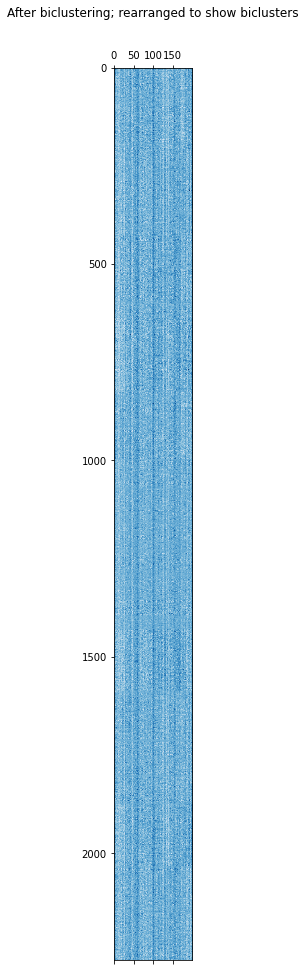

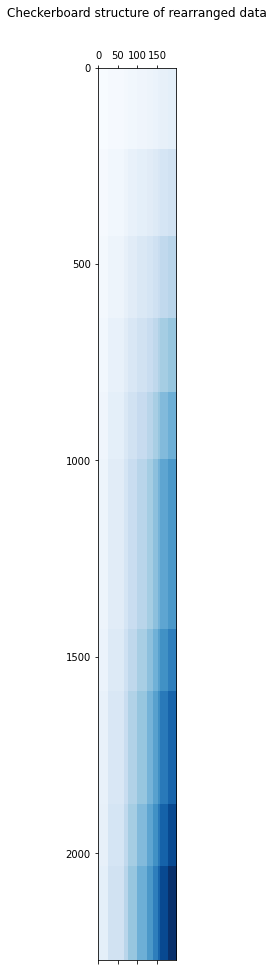

In [101]:
fit_data = data[np.argsort(model.row_labels_)]
fit_data = fit_data[:, np.argsort(model.column_labels_)]

plt.matshow(fit_data, cmap=plt.cm.Blues)
plt.title("After biclustering; rearranged to show biclusters")

plt.matshow(np.outer(np.sort(model.row_labels_) + 1,
                     np.sort(model.column_labels_) + 1),
            cmap=plt.cm.Blues)
plt.title("Checkerboard structure of rearranged data")

plt.show()
